# SVM Klassifikator

Gegeben sind folgende Lerndaten ($D=2$, zwei Klassen $M=2$)

$$
X = \begin{bmatrix}
0.2 &0.3 &0.4 &0.6 &0.1 &0.4 &0.6 &0.7 &0.8\\
0.7 &0.3 &0.5 &0.4 &0.6 &0.2 &0.4 &0.6 &0.6
\end{bmatrix} \newline
\mathbf{t} = \begin{bmatrix} 1 &1 &1 &1 &1 &-1 &-1 &-1 &-1 &-1\end{bmatrix}
$$


## Aufgabe 1

Verwenden Sie den linearen SVM Ansatz (`sklearn.svm.SVC` mit `kernel='linear'`), um mit Python einen Klassifikator zu trainieren.
Stellen Sie die Entscheidungsregionen dar (`svmclassify`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0.2, 0.3, 0.4, 0.3, 0.1, 0.7, 0.6, 0.7, 0.8, 0.8],
    [0.7, 0.3, 0.5, 0.5, 0.4, 0.6, 0.2, 0.4, 0.6, 0.6]]).T
# transponieren beachten!

t = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

print(X)
print(t)

[[0.2 0.7]
 [0.3 0.3]
 [0.4 0.5]
 [0.3 0.5]
 [0.1 0.4]
 [0.7 0.6]
 [0.6 0.2]
 [0.7 0.4]
 [0.8 0.6]
 [0.8 0.6]]
[ 1  1  1  1  1 -1 -1 -1 -1 -1]


In [2]:
print('Punkte der Klasse 1')
print(X[t==1, 0])
print(X[t==1, 1])
print()
print('Punkte der Klasse 2')
print(X[t==-1, 0])
print(X[t==-1, 1])

Punkte der Klasse 1
[0.2 0.3 0.4 0.3 0.1]
[0.7 0.3 0.5 0.5 0.4]

Punkte der Klasse 2
[0.7 0.6 0.7 0.8 0.8]
[0.6 0.2 0.4 0.6 0.6]


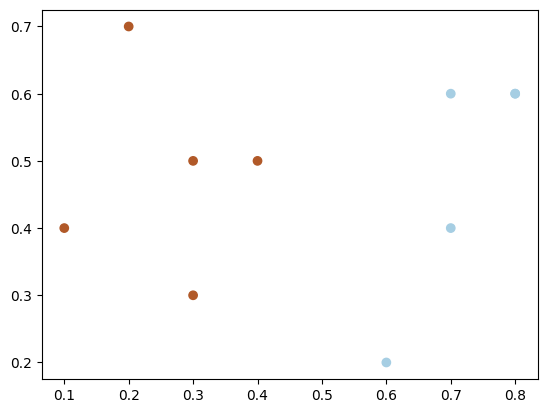

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.Paired)
plt.show()

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X, t)

SVC(kernel='linear')

In [5]:
# Grid für Modell-Auswertung
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - .05, X[:, 0].max() + .05),
                     np.linspace(X[:, 1].min() - .05, X[:, 1].max() + .05))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

In [6]:
# Entscheidungsregion
Z = svc.decision_function(xy)
Z = Z.reshape(xx.shape)

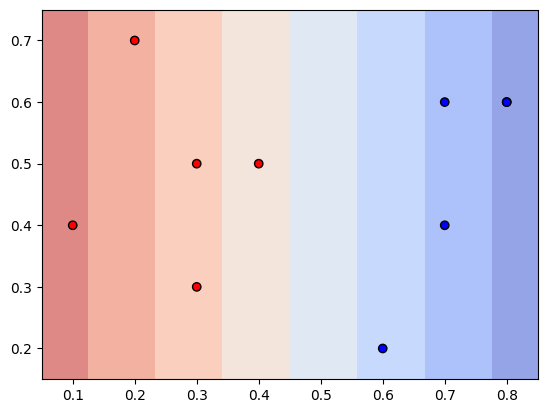

In [7]:
from matplotlib.colors import ListedColormap

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

cm = ListedColormap(['#0000FF', '#FF0000'])
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cm, edgecolors='k')
plt.show()

## Aufgabe 2

> Verwenden Sie verschiedene Kerne für den SVM-Klassifikator (`'poly'`, `'rbf'`, '`sigmoid`').
> Stellen Sie die Entscheidungsregionen dar.

![SVC mit verschiedenen Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

poly


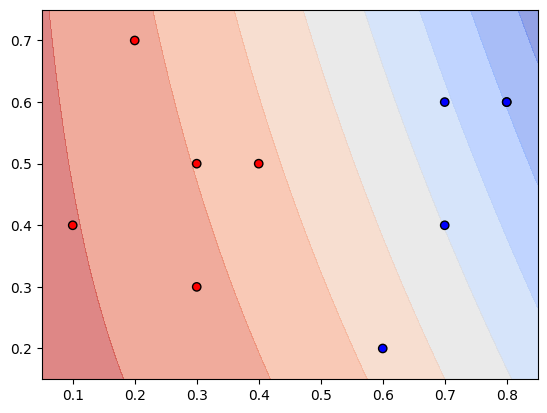

rbf


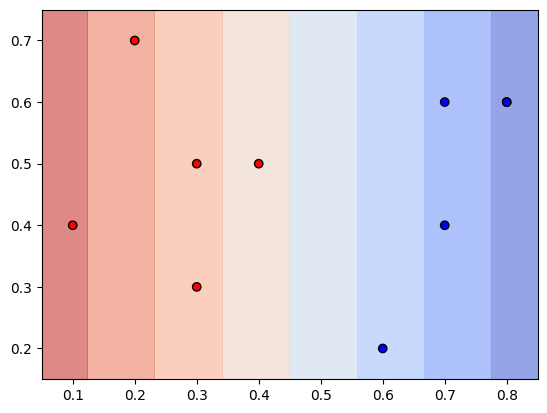

sigmoid


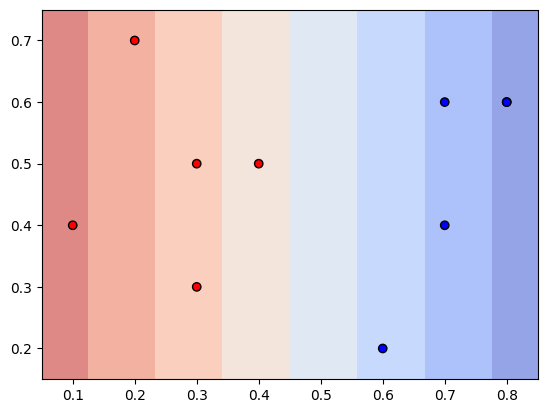

In [8]:
kernels = ['poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(kernel)
    svc = SVC(
        kernel=kernel,
        gamma=0.001,    # default: 1 / (n_features * X.var())
        degree=2        # default: 3
    )
    svc = svc.fit(X, t)
    
    Z = svc.decision_function(xy)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cm, edgecolors='k')
    plt.show()

## Aufgabe 3

> SVM-Klassifikatoren arbeiten per Ansatz nur für 2 Klassen.
> Wie könnte man einen Klassifikator bilden, der für mehr als 2 Klassen funktioniert?

- One-vs-Rest-Klassifikation
    - auch *One-vs-All* (OVA) genannt
    - Trainieren von mehreren Modellen als *Experten*
    - Modelle trennen jeweils eine Klasse vom Rest ab
    - Klassifikation anhand der Ausgaben der Experten
        - Idealfall: alle bis auf einer klassifizieren, dass Punkt nicht zur jeweiligen Klasse gehört
        - Problem: mehrere sagen, dass Punkt dazu gehört (bspw. Mitte) $\to$ *Niemandsland*
            - Abstand runden
- One-vs-One-Klassifikation
    - Experten für jede Klasse gegen jede Klasse
    - Entscheidung anhand der Majorität $\to$ wenn mehr als Hälfte sagt, dass Punkt zu bestimmter Klasse zugehörig, dann Klassifikation zu dieser
    - falls nicht eindeutig, (Dreieck in Mitte): Klasse mit höchstem Wert der Diskriminanzfunktion / Abstandes

🔗 [SciKit-Learn: Multiclass and multioutput algorithms](https://scikit-learn.org/stable/modules/multiclass.html)

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_classes=3, random_state=1, n_clusters_per_class=1)
X += 2 * np.random.RandomState(2).uniform(size=X.shape)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

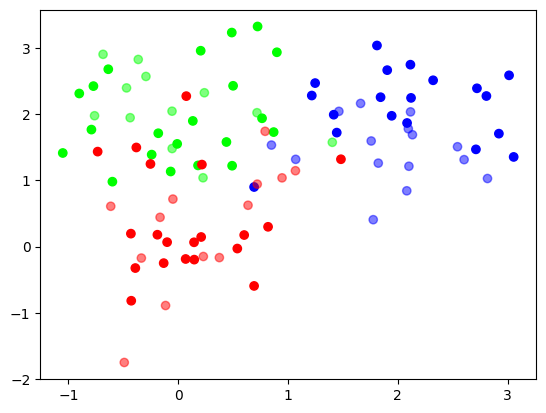

In [11]:
cm = plt.cm.rainbow
cm_bright = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5)
plt.show()

In [12]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - .05, X[:, 0].max() + .05, 1000),
                     np.linspace(X[:, 1].min() - .05, X[:, 1].max() + .05, 1000))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

### One-vs-One-Klassifikation

In [13]:
def plot(Z, cm):
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors='k')
    plt.show()

Grün vs Blau


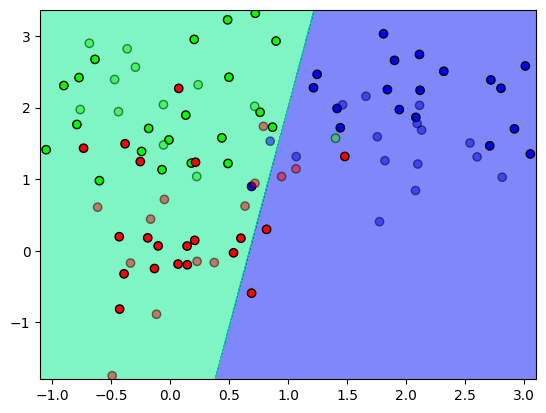


Rot vs Blau


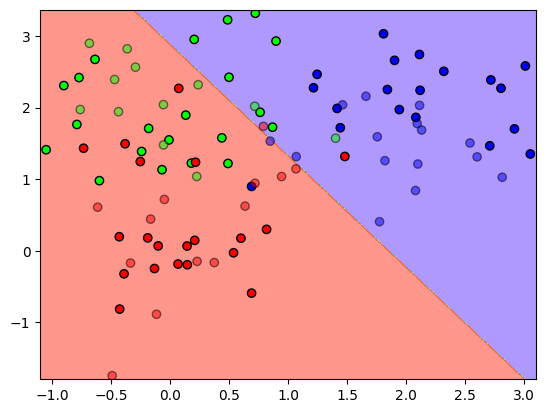


Rot vs Grün


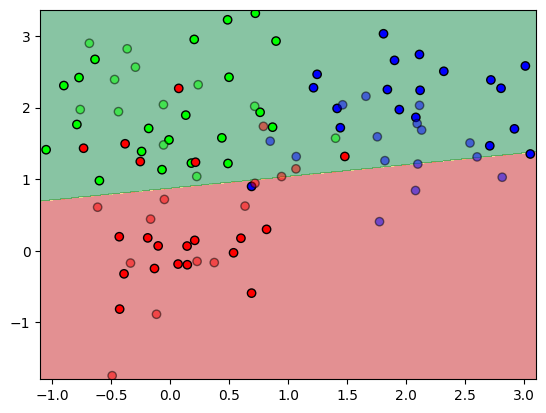

In [14]:
print("Grün vs Blau")
svc = SVC(kernel='linear')
svc = svc.fit(X_train[y_train != 2, :], y_train[y_train != 2])

Z = np.sign(svc.decision_function(xy)) / 2 + 1
Z = Z.reshape(xx.shape)

plot(Z, plt.cm.winter)


print()
print("Rot vs Blau")
svc = SVC(kernel='linear')
svc = svc.fit(X_train[y_train != 1, :], y_train[y_train != 1])

Z = np.sign(svc.decision_function(xy)) + 1
Z = Z.reshape(xx.shape)

plot(Z, plt.cm.rainbow)

print()
print("Rot vs Grün")
svc = SVC(kernel='linear')
svc= svc.fit(X_train[y_train != 0, :], y_train[y_train != 0])

Z = np.sign(-1 * svc.decision_function(xy)) / 2 + 2
Z = Z.reshape(xx.shape)

plot(Z, plt.cm.RdYlGn)

In [15]:
svc = SVC(kernel='linear')
svc= svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('score =', svc.score(X_test, y_test))

score = 0.875


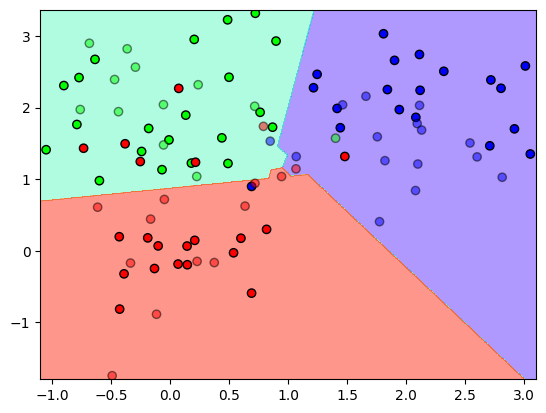

In [16]:
Z = np.argmax(svc.decision_function(xy), axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.5)
plt.show()